## Quick&Dirty inspection of OBDT runs

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import time

from bokeh.io import show, output_file, curdoc, output_notebook
from bokeh.models import ColumnDataSource, BoxAnnotation
from bokeh.plotting import figure
from bokeh.layouts import gridplot, column, row
from bokeh.transform import jitter
from bokeh.models import formatters
output_notebook()

import matplotlib.pyplot as plt
%matplotlib notebook

Loading BokehJS ...

### Load up a run

In [2]:
start = time.time()
daskdf = dd.read_csv('Run000622/data_*.txt')
end = time.time()
print end-start


0.0284399986267


### First descriptive inspection of the whole DF

In [3]:
daskdf.head(20)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,0,0,170,2871700134,2730,21
1,0,0,170,2871700134,2730,21
2,0,0,170,2871700134,2730,21
3,0,0,170,2871700134,2730,21
4,0,0,170,2871700134,2730,21
5,0,0,170,2871700134,2730,21
6,0,0,170,2871700134,2730,21
7,0,0,170,2871700134,2730,21
8,0,0,170,2871700134,2730,21
9,0,0,170,2871700134,2730,21


In [4]:
print 'ALL HITS                         = ', len(daskdf)
print ''
print daskdf.describe().compute()
print ''
print 'ALL HITS [TDC_MEAS<=0]           = ', len(daskdf[daskdf.TDC_MEAS<=0])
print ''
print 'ALL HITS [TDC_MEAS>30]           = ', len(daskdf[daskdf.TDC_MEAS>30])
print ''


ALL HITS                         =  8572160

               HEAD          FPGA   TDC_CHANNEL     ORBIT_CNT    BX_COUNTER  \
count  8.572160e+06  8.572160e+06  8.572160e+06  8.572160e+06  8.572160e+06   
mean   9.847107e-01  1.049910e-06  8.606755e+01  6.766079e+07  1.797008e+03   
std    1.227009e-01  1.024651e-03  5.868669e+01           NaN  1.027764e+03   
min    0.000000e+00  0.000000e+00  1.300000e+01  1.850216e+06  0.000000e+00   
25%    1.000000e+00  0.000000e+00  4.900000e+01  1.338346e+07  9.890000e+02   
50%    1.000000e+00  0.000000e+00  8.200000e+01  3.052713e+07  1.979000e+03   
75%    1.000000e+00  0.000000e+00  1.530000e+02  4.528375e+07  2.730000e+03   
max    1.000000e+00  1.000000e+00  2.380000e+02  2.871700e+09  3.564000e+03   

           TDC_MEAS  
count  8.572160e+06  
mean   1.556004e+01  
std    8.615445e+00  
min    1.000000e+00  
25%    9.000000e+00  
50%    1.700000e+01  
75%    2.300000e+01  
max    3.000000e+01  

ALL HITS [TDC_MEAS<=0]           =  0

ALL H

### Active channels

In [5]:
p_tdcchan = figure(
    plot_width=600,
    plot_height=400,
    title="active channels",
    y_axis_label="hits",
    x_axis_label="channel",
    )

histchan, edgeschan = np.histogram(daskdf.TDC_CHANNEL, density=False, bins=range(0,280))

p_tdcchan.quad(top=histchan,
              bottom=0,
              left=edgeschan[:-1],
              right=edgeschan[1:])


show(p_tdcchan)

print daskdf.TDC_CHANNEL.describe().compute()
print ''
print 'Unique active TDC channels:'
print sorted(daskdf['TDC_CHANNEL'].unique().values.compute())
print ''
print 'Most active TDC channels:'
print daskdf.groupby('TDC_CHANNEL')['HEAD'].count().compute().sort_values(ascending=False)

count    8.572160e+06
mean     8.606755e+01
std      5.868669e+01
min      1.300000e+01
25%      4.900000e+01
50%      8.200000e+01
75%      1.530000e+02
max      2.380000e+02
dtype: float64

Unique active TDC channels:
[13, 14, 16, 17, 19, 20, 22, 29, 31, 32, 34, 37, 38, 39, 40, 42, 43, 45, 49, 51, 52, 53, 57, 61, 62, 68, 73, 77, 82, 88, 90, 96, 105, 108, 115, 119, 120, 124, 137, 142, 146, 147, 148, 149, 152, 153, 155, 156, 157, 159, 166, 170, 186, 209, 215, 221, 222, 235, 238]

Most active TDC channels:
TDC_CHANNEL
82     970558
52     896823
29     561948
157    437126
51     425593
57     374470
147    276202
61     270550
37     266186
215    247968
119    242863
22     242310
16     214426
221    198355
120    183293
153    175186
32     164814
20     160960
152    146253
49     141332
17     136050
170    131062
45     119311
19     116346
142     82947
40      80860
31      80551
108     78269
115     75929
13      75059
155     72574
146     67537
222     60109
73      55781
1

### TDCs

In [6]:
p_tdcmeas = figure(
    plot_width=600,
    plot_height=400,
    title="TDC counts",
    y_axis_label="hits",
    x_axis_label="tdc",
    )

histmeas, edgesmeas = np.histogram(daskdf.TDC_MEAS,         density=False, bins=range(0,35))

p_tdcmeas.quad(top=histmeas,
              bottom=0,
              left=edgesmeas[:-1],
              right=edgesmeas[1:])

show(p_tdcmeas)

print daskdf.TDC_MEAS.describe().compute()

count    8.572160e+06
mean     1.556004e+01
std      8.615445e+00
min      1.000000e+00
25%      9.000000e+00
50%      1.700000e+01
75%      2.300000e+01
max      3.000000e+01
dtype: float64


### BX counters

In [7]:
p_bxid = figure(
    plot_width=600,
    plot_height=400,
    title="BX ID",
    y_axis_label="hits",
    x_axis_label="bx",
    )

histbx, edgesbx = np.histogram(daskdf.BX_COUNTER,         density=False, bins=range(0,3700))

p_bxid.quad(top=histbx,
              bottom=0,
              left=edgesbx[:-1],
              right=edgesbx[1:])

show(p_bxid)

print daskdf.BX_COUNTER.describe().compute()

count    8.572160e+06
mean     1.797008e+03
std      1.027764e+03
min      0.000000e+00
25%      9.890000e+02
50%      1.979000e+03
75%      2.730000e+03
max      3.564000e+03
dtype: float64


## Filter out the 2730 spike

In [32]:
daskdf_cleaned = daskdf[daskdf.BX_COUNTER != 2730]

daskdf[daskdf.BX_COUNTER == 2730].groupby('TDC_CHANNEL').count().compute()

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS
TDC_CHANNEL,,,,,
14,14,14,14,14,14
16,80,80,80,80,80
19,55,55,55,55,55
20,47,47,47,47,47
22,140,140,140,140,140
29,235,235,235,235,235
42,10,10,10,10,10
43,13,13,13,13,13
45,43,43,43,43,43


In [9]:
p_tdcchan = figure(
    plot_width=600,
    plot_height=400,
    title="active channels",
    y_axis_label="hits",
    x_axis_label="channel",
    )
histchan, edgeschan = np.histogram(daskdf_cleaned.TDC_CHANNEL, density=False, bins=range(0,280))
p_tdcchan.quad(top=histchan,
              bottom=0,
              left=edgeschan[:-1],
              right=edgeschan[1:])

p_tdcmeas = figure(
    plot_width=600,
    plot_height=400,
    title="TDC counts",
    y_axis_label="hits",
    x_axis_label="tdc",
    )
histmeas, edgesmeas = np.histogram(daskdf_cleaned.TDC_MEAS,         density=False, bins=range(0,35))
p_tdcmeas.quad(top=histmeas,
              bottom=0,
              left=edgesmeas[:-1],
              right=edgesmeas[1:])

p_bxid = figure(
    plot_width=600,
    plot_height=400,
    title="BX ID",
    y_axis_label="hits",
    x_axis_label="bx",
    )
histbx, edgesbx = np.histogram(daskdf_cleaned.BX_COUNTER,         density=False, bins=range(0,3700))
p_bxid.quad(top=histbx,
              bottom=0,
              left=edgesbx[:-1],
              right=edgesbx[1:])

show(column(p_tdcchan,p_tdcmeas,p_bxid))

print daskdf_cleaned.BX_COUNTER.describe().compute()

count    8.438533e+06
mean     1.782233e+03
std      1.029088e+03
min      0.000000e+00
25%      8.940000e+02
50%      1.784000e+03
75%      2.676000e+03
max      3.564000e+03
dtype: float64


Text(0,0.5,'diff in bx')

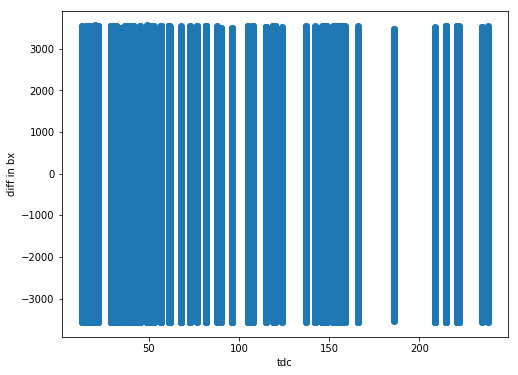

In [13]:
plt.figure(figsize=(8,6))

plt.scatter(x=daskdf_cleaned.TDC_CHANNEL.compute(),
            y=daskdf_cleaned.BX_COUNTER.diff().compute()
           )
plt.xlabel("channel")
plt.ylabel("diff in bx")

### Absolute time

(-500000.0, 10000000.0)

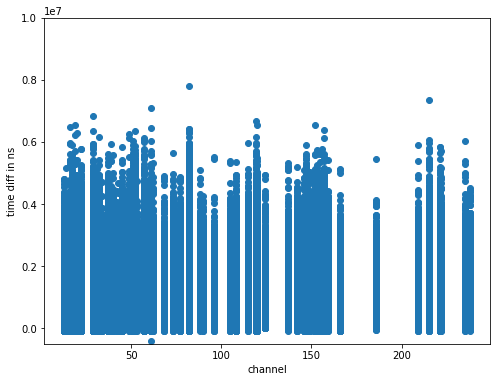

In [40]:
daskdf_cleaned['TIME_ABS'] = (daskdf_cleaned['ORBIT_CNT'].astype(np.float64)*25.*3564. +
                            daskdf_cleaned['BX_COUNTER'].astype(np.float64)*25.   +
                            daskdf_cleaned['TDC_MEAS'].astype(np.float64)*25./30.).astype(np.float64)

plt.figure(figsize=(8,6))

plt.scatter(x=daskdf_cleaned.TDC_CHANNEL.compute(),
            y=daskdf_cleaned.TIME_ABS.diff().compute()
           )
plt.xlabel("channel")
plt.ylabel("time diff in ns")
plt.ylim(-5e5, 1e7)


(0, 10000)

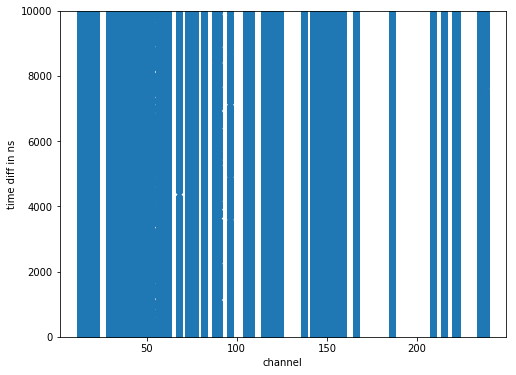

In [41]:
daskdf_cleaned['TIME_ABS'] = (daskdf_cleaned['ORBIT_CNT'].astype(np.float64)*25.*3564. +
                            daskdf_cleaned['BX_COUNTER'].astype(np.float64)*25.   +
                            daskdf_cleaned['TDC_MEAS'].astype(np.float64)*25./30.).astype(np.float64)

plt.figure(figsize=(8,6))

plt.scatter(x=daskdf_cleaned.TDC_CHANNEL.compute(),
            y=daskdf_cleaned.TIME_ABS.diff().compute()
           )
plt.xlabel("channel")
plt.ylabel("time diff in ns")
plt.ylim(0, 10000)


In [16]:
# NCHANNELS = 250   # numbers of channels per chamber (one FPGA maps 2 chanbers --> 128 channels per FPGA --> 2SLs)
# XCELL     = 42.   # cell width in mm
# ZCELL     = 13.   # cell height in mm
# TDRIFT    = 15.6  # drift time in bx
# vDrift    = xcell*0.5 / (tDrift*25.) # drift velocity in mm/ns 

# #############################################
# ### MEANTIMER EQUATIONS
# def meantimereq(tkey = '', timelist = []):
#   if tkey in ['ABC','BCD']: 
#     return [0.25 * (    timelist[0] + 2.*timelist[1] +    timelist[2] - 2*tDrift), math.atan(0.5 * (timelist[2] - timelist[0]) * vDrift / zcell)]
#   elif tkey == 'ABD':
#     return [0.25 * ( 2.*timelist[0] + 3.*timelist[1] -    timelist[2] - 2*tDrift), math.atan(0.5 * (timelist[1] - timelist[2]) * vDrift / zcell)]
#   elif tkey == 'ACD':
#     return [0.25 * (   -timelist[0] + 3.*timelist[1] + 2.*timelist[2] - 2*tDrift), math.atan(0.5 * (timelist[2] - timelist[0]) * vDrift / zcell)]
#   return None
# pass 

# #############################################
# ### CELL PATTERNS FOR MEANTIMER PATTERN MATCHING 
# ALLpatterns = {}
# ### 3 ABC RIGHT
# ALLpatterns['ABC']  = [ [1+x, 3+x,   2+x] for x in range(0,nchannels,4) ]    
# #A |1   o    |5   x    |9   o    |
# #B     |3   o    |7   x    |
# #C |2   o    |6   x    |10  o    |
# #D     |4   o    |8   o    |
# ### 3 ABC LEFT
# ALLpatterns['ABC'] += [ [1+x, -1+x,  2+x] for x in range(0,nchannels,4) ]
# #A |1   o    |5   x    |9   o    |
# #B     |3   x    |7   o    |
# #C |2   o    |6   x    |10  o    |
# #D     |4   o    |8   o    |

# ### 3 BCD RIGHT
# ALLpatterns['BCD']  = [ [3+x, 6+x,  4+x] for x in range(0,nchannels,4) ]
# #A |1   o    |5   o    |9   o    |
# #B     |3   x    |7   o    |
# #C |2   o    |6   x    |10  o    |
# #D     |4   x    |8   o    |
# ### 3 BCD LEFT
# patterns['BCD'] += [ [3+x, 2+x,  4+x] for x in range(0,nchannels,4) ]
# #A |1   o    |5   o    |9   o    |
# #B     |3   x    |7   o    |
# #C |2   x    |6   o    |10  o    |
# #D     |4   x    |8   o    |

# ### 3 ACD RIGHT
# ALLpatterns['ACD']  = [ [1+x, 2+x,   4+x] for x in range(0,nchannels,4) ]
# #A |1   o    |5   x    |9   o    |
# #B     |3   o    |7   o    |
# #C |2   o    |6   x    |10  o    |
# #D     |4   o    |8   x    |
# ### 3 ACD LEFT
# ALLpatterns['ACD'] += [ [1+x, 2+x,   x] for x in range(0,nchannels,4) ]
# #A |1   o    |5   x    |9   o    |
# #B     |3   o    |7   o    |
# #C |2   o    |6   x    |10  o    |
# #D     |4   x    |8   o    |

# ### 3 ABD RIGHT
# ALLpatterns['ABD'] = [ [1+x, 3+x,   4+x] for x in range(0,nchannels,4) ]
# #A |1   o    |5   x    |9   o    |
# #B     |3   o    |7   x    |
# #C |2   o    |6   o    |10  o    |
# #D     |4   o    |8   x    |
# ### 3 ABD LEFT
# ALLpatterns['ABD'] += [[1+x, x-1,   x] for x in range(0,nchannels,4) ]
# #A |1   o    |5   x    |9   o    |
# #B     |3   x    |7   o    |
# #C |2   o    |6   o    |10  o    |
# #D     |4   x    |8   o    |


In [17]:
#   conditions  = [
#     (pandasdf['TDC_CHANNEL'] % 4 == 1 ),
#     (pandasdf['TDC_CHANNEL'] % 4 == 2 ),
#     (pandasdf['TDC_CHANNEL'] % 4 == 3 ),
#     (pandasdf['TDC_CHANNEL'] % 4 == 0 ),
#   ]
#   layer_z     = [  1,            3,            2,            4,         ]
#   chanshift_x = [  0,            -1,           0,            -1,        ]
#   pos_z       = [  ZCELL*3.5,    ZCELL*1.5,    ZCELL*2.5,    ZCELL*0.5, ]
#   posshift_x  = [  0,            0,            0.5,          0.5,       ]

#   # Adding columns
#   pandasdf['LAYER']        = np.select(conditions, layer_z,      default=0).astype(np.uint8)
#   pandasdf['X_CHSHIFT']    = np.select(conditions, chanshift_x,  default=0).astype(np.int8)
#   pandasdf['X_POSSHIFT']   = np.select(conditions, posshift_x,   default=0).astype(np.float16)
#   pandasdf['Z_POS']        = np.select(conditions, pos_z,        default=0).astype(np.float16)
#   pandasdf['SL']           = 0
#   pandasdf['TDC_CHANNEL_NORM'] = pandasdf['TDC_CHANNEL']
#   pandasdf['TIME0']        = -1
#   pandasdf['TIME_ABS']     = (pandasdf['ORBIT_CNT'].astype(np.float64)*3564*25 +
#                              pandasdf['BX_COUNTER'].astype(np.float64)*25   +
#                              pandasdf['TDC_MEAS'].astype(np.float64)/30*25).astype(np.float64)

#   events = pandasdf.groupby('ORBIT_CNT')


In [18]:
# import itertools

# def dostuff(event, df):
#   if df.shape[0] < 3:
#     return []
#   else:
#     df = df.loc[(df['TDC_CHANNEL']!=139)]
#     tzeros = meantimer_results(df)[0]
#     return tzeros

# def meantimer_results(df_hits, verbose=False):
#   """Run meantimer over the group of hits"""
#   sl = df_hits['SL'].iloc[0]
#   # Getting a TIME column as a Series with TDC_CHANNEL_NORM as index
#   df_time = df_hits.loc[:, ['TDC_CHANNEL_NORM', 'TIME_ABS', 'LAYER']]
#   df_time.sort_values('TIME_ABS', inplace=True)
#   # Split hits in groups where time difference is larger than maximum event duration
#   grp = df_time['TIME_ABS'].diff().fillna(0)
#   event_width_max = 1.1*TDRIFT
#   grp[grp <= event_width_max] = 0
#   grp[grp > 0] = 1
#   grp = grp.cumsum().astype(np.uint16)
#   df_time['grp'] = grp
#   # Removing groups with less than 3 unique hits
#   df_time = df_time[df_time.groupby('grp')['TDC_CHANNEL_NORM'].transform('nunique') >= 3]
#   # Determining the TIME0 using triplets [no external trigger]
#   tzeros = []
#   angles = []
#   # Processing each group of hits
#   patterns = ALLpatterns.keys()
#   for grp, df_grp in df_time.groupby('grp'):
#     df_grp.set_index('TDC_CHANNEL_NORM', inplace=True)
#     # Selecting only triplets present among physically meaningful hit patterns
#     channels = set(df_grp.index.astype(np.int16))
#     triplets = set(itertools.permutations(channels, 3))
#     triplets = triplets.intersection(patterns)
#     # Grouping hits by the channel for quick triplet retrieval
#     times = df_grp.groupby(df_grp.index)['TIME_ABS']
#     # Analysing each triplet
#     for triplet in triplets:
#       triplet_times = [times.get_group(ch).values for ch in triplet]
#       for t1 in triplet_times[0]:
#         for t2 in triplet_times[1]:
#           for t3 in triplet_times[2]:
#             timetriplet = (t1, t2, t3)
#             if max(timetriplet) - min(timetriplet) > 1.1*TDRIFT:
#               continue
#             pattern = ALLpatterns[triplet]
#             mean_time, angle = meantimereq(pattern, timetriplet)
#             if verbose:
#               print('{4:d} {0:s}: {1:.0f}  {2:+.2f}  {3}'.format(pattern, mean_time, angle, triplet, sl))
#             if not MEANTIMER_ANGLES[sl][0] < angle < MEANTIMER_ANGLES[sl][1]:
#               continue
#             tzeros.append(mean_time)
#             angles.append(angle)

#   return tzeros, angles


# for event, df in events:
#     tzero = dostuff(event, df)
#     print event, len(tzero)
#     if len(tzero) > 0:
#           pandasdf.loc[pandasdf['ORBIT_CNT']==event,'TIME0'] = np.mean(tzero) 
